In [ ]:
"""
<합성곱신경망(Convolutional Neural Network, CNN)>
 - 이미지 분석에 주로 사용되는 대표적 계층
 
 - 기존의 인공신경망에서의 이미지 분석시에는 높이와 너비를 1차원으로 사용하였다면,
   -> 합성곱신경망(CNN)은 원형 그대로의 이미지 높이와 너비 "2차원을 원본 그대로 사용"
   
 - 합성곱신경망(CNN)에서 훈련에 사용하는 차원은 4차원을 사용합니다.
   --> 4차원 데이터 = (행의갯수, 이미지사이즈1, 이미지사이즈2, 채널)
   --> 채널 : 이미지의 색상(흑백 또는 컬러)을 의미합니다.
            : 흑백은 1의 값, 컬러는 RGB의 3의 값을 사용합니다.
            : 흑백 => (행의갯수, 이미지사이즈1, 이미지사이즈2, 1)
            : 컬러 => (행의갯수, 이미지사이즈1, 이미지사이즈2, 3)
           
 - 우리가 사용하는 패션 이미지 데이터는 흑백 사진 픽셀 데이터 입니다.
 
<합성곱신경망(CNN)을 사용하는 이유>
 - 기존 이미지 분석 시 높이와 너비를 곱하여 1차원으로 사용하게되면,
  * 원형 그대로의 주변 이미지 공간 정보를 활용하지 못하는 단점이 발생
  * 이러한 이유로 "특정 픽셀의 주변 특징 추출"을 잘 못하여,
     -> 학습이 잘 이루어지지 않는 경우가 발생함


 - 기존 인공신경망 모델의 단점을 보완하여 만들어진 계층이 -> CNN 계층입니다.
  * 원본 형태의 이미지 정보를 그대로 유지한 상태로 학습 가능한 계층임
  * 이미지의 공간("격자"라고 합니다. 픽셀이 아님) 정보를 나누어서 특징을 추출합니다.
  * 인접 이미지의 특징을 포함하여 훈련됩니다.
 
<합성곱신경망(CNN) 계층구조>
 1. 입력계층 : 아래 2번, 3번, 5번은 입력계층으로 사용 가능
 2. 합성곱계층(CNN)
   - 이미지 특징을 추출하는 계층
 3. 활성화 함수 계층(은닉계층-Hidden Layer)
 4. 풀링계층(Pooling Layer)
  - 공간 크기를 줄이고 계산량을 감소시키기 위한 계층(중요 특징만 추출하는 계층)
  - 머신러닝에서 주성분분석(PCA)과 유사한 기능
  - 풀링방법 : 최대풀링(Max Pooling), 평균풀링(Average Pooling)이 있음
  - 주로 최대풀링(Max Pooling) 사용
 5. 완전 연결 계층(은닉계층-Hidden Layer)
  - 추출된 특징을 이용해서 최종 예측 전 수행하는 계층
  - 이때는 기존의 방법과 동일하게 1차원(높이*너비)의 전처리 계층(Flatten)을
    사용하는 경우도 있음(인공신경망 구조와 동일하게 진행)
 6. 출력계층
 
 ** CNN계층에서는 2~4번 계층구조가 일반적으로 사용되며,
    나머지 계층은 기존 인공신경망 구조를 따름
     --> 2~4번 계층 셋트가 여러개 포함 될 수 있음
 
"""

### 라이브러리 정의하기

In [1]:
### 텐서플로우 프레임워크(패키지)
import tensorflow as tf

### 케라스 라이브러리
from tensorflow import keras
from keras.layers import Input, Dense, Conv2D, MaxPool2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint


### 시각화 라이브러리
import matplotlib.pyplot as plt

### 넘파이
import numpy as np

### 데이터 분류
from sklearn.model_selection import train_test_split

### 딥럽닝 랜던 규칙
tf.keras.utils.set_random_seed(42)

### 사용할 데이터 불러들이기 - 패션 이미지

In [2]:
### 변수명 : train_input, train_target, test_input, test_target

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### CNN 처리를 위해서 독립변수의 차원을 4차원으로 변환하기

In [3]:
### 이미지 데이터가 흑백 or 컬러 확인하기
# - 마지막 차원의 값이 1개의 값으로 구성되어 있는지 3개의 값으로 구성되어 있는지 확인
train_input[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [4]:
### (행, 너비, 높이, 채널)의 4차원으로 변환
### (축, 행, 열, 채널)
# - 채널 : 흑백 이미지는 1의 값을, 컬러 이미지는 3의 값을 사용
# - 최종 차원 = (행, 너비, 높이, 채널) = (60000, 28, 28, 1)
train_input_4d = train_input.reshape(-1, 28, 28, 1)

print(train_input_4d.shape, train_target.shape)
print(test_input.shape, test_target.shape)


(60000, 28, 28, 1) (60000,)
(10000, 28, 28) (10000,)


In [5]:
### 데이터를 0~1사이의 값으로 스케일링 처리하기
# - 데이터는 픽셀 데이터로 0~255까지의 데이터를 사용하고 있음
train_scaled = train_input_4d / 255.0

print(train_scaled.shape, train_target.shape)
print(train_scaled[1][0])

(60000, 28, 28, 1) (60000,)
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.00392157]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.16078431]
 [0.7372549 ]
 [0.40392157]
 [0.21176471]
 [0.18823529]
 [0.16862745]
 [0.34117647]
 [0.65882353]
 [0.52156863]
 [0.0627451 ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


### 훈련 : 검증 = 8 : 2로 분류하기

In [6]:
### 사용변수 : train_scaled, train_target, val_scaled, val_target
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)


### 훈련모델 생성하기 : CNN 합성곱신경망 사용

In [ ]:
"""
<합성곱신경망(CNN) 계층 속성>
 - CNN은 데이터(행영 원본 데이터)와 필터(filter)가 곱해진다고 해서 
  -> 합성곱이라는 단어가 생겨났습니다.
 - 이미지와 같은 2차원(이미지 사이즈1 * 이미지 사이즈2) 데이터 분류에는 보통 2차원 합성곱(Conv2D) 사용
 - 입력 계층으로 사용하는 경우에는 input_shape() 사용
 
 (kernel_size, 커널사이즈)
  - 이미지를 훓으면서 특징을 추출하는 역할을 수행
  - 필터에서 사용할 사이즈를 정의함
  - kernel_size = 3의 의미 : 필터가 사용할 사이즈는 3행 3열로 특징 추출 진행
                             (3행 3열을 줄여서 3이라고 정의)
  - kernel_size는 홀수로 정의 : 보통 3, 5, 7, 9..(주로 3, 5를 사용)
 
 (filters, 필터)
  - 데이터를 훓으면서(strides) 특징을 추출하는 역할을 함(필터링 개념)
  - 필터의 값이 클수록 훈련 속도가 오래 걸림
  - 보통 32, 64가 주로 사용됨
  - CNN계층을 여러개 사용하는 경우에는 처음 CNN계층에는 작은값부터 시작..
    -> 16, 32, 64, 128...정도가 주로  사용됨
  - 필터의 갯수는 해당 레이어에서의 출력 갯수가 됨
 
(padding, 패팅)
 - 경계 처리 방식을 정의
 - 커널 사이즈에 대한 원본 사이즈가 부적합할 경우 주변 픽셀을 만들어서 사용하는 방법
 - 입력(이미지 높이 * 너비) 데이터의 주변에 추가되는 가상의 공간을 만듬
 - 패딩을 사용하지 않으면, 중복이 일어나지 않은 픽셀값들이 발생함(처음과 마지막 픽셀들)
   (중복이 일어나지 않으면 특징 추출 시 정밀성이 떨어짐)
   --> 따라서, 중복을 허용할 수 있도록 하기 위해 주변에 가상공간을 두어서 하는 경우가 있음
 - 처리 방식 : same과 valid가 있음
  * same : 패팅을 사용하여 입력과 출력의 크기를 동일하게 만들어서 훈련하고자 할때 사용
  * valid : 패팅을 사용하지 않음을 의미함
  * same을 주로 사용하도록 권장하고 있음
 
(strides, 스트라이드)
 - 커널 사이즈에 해당하는 필터가 이미지 데이터의 특징을 추출하기 위해 이동하는 간격 정의
 - 특징 추출을 위한 이동 순서 : 왼쪽에서 -> 오른쪽, 위에서 -> 아래로
 - strides=1의 의미 : 오른쪽으로 1씩, 아래로 1씩 이동한다는 의미
"""


In [ ]:
"""
<풀링계층(Pooling Layer)>
 - CNN 계층 추가 이후에 일반적으로 함께 사용되는 계층
 - CNN 계층에서 추출된 특징들 중에 중요한 정보만을 추출하는 계층
 - 머신러닝의 주성분분석(PCA)과 유사한 개념
 
 - 이미지를 구성하는 픽셀들이, 주변 픽셀들끼리는 유사한 정보를 가진다는 개념에서 접근
 - 중복된 값들이나 유사한 값들을 대표하는 값들, 즉 중요한 특징을 가지는 값들만 추출
 - 과적합 방지에 효율적으로 사용되며,
 - 훈련에 참여하지는 않는 "전처리 계층" 입니다.
 
<MaxPool2D>
 - 사소한 값들(특징이 약한 값들)은 무시하고, 최대값의 특징들만 추출하는 방식
 - pool_size=2 : 2행 2열의 공간에 중요 특징들만 저장하라는 의미
 - strides=2 : CNN에서 추출한 특징값들은 행렬 구조 데이터로,
               2행2열의 공간을 이용하여 오른쪽으로 2칸씩, 아래로 2칸씩 움직이면서 추출
             : 디폴트(기본값)은 2..
 - 풀링 계층에서 대표적으로 사용되는 계층입니다.
"""

##### 풀링계층(Pooling Layer) 추가하기
##### CNN 계층 추가하기
##### 심층신경망(DNN)을 이용해서 최종 결과 도출 계층 생성하기

In [ ]:
"""
1. 1차원 전처리 계층 추가하기 
   : 이전 계층의 출력값을 입력으로 받아서 자동으로 1차원으로 만들어줍니다
2. 은닉계층 추가하기 : 출력갯수 100개, 활성화함수 relu
3. 일부 특성 제외하기 위한 계층 추가 : 20% 훈련에서 제외
4. 출력계층 추가하기
"""

In [7]:
### 모델 생성하기
# - 입력계층 추가하기 : 합성곱신경망(CNN) 계층을 입력으로 사용
model = Sequential([
    # Conv2D : 2D는 이미지 높이, 너비의 2차원을 의미함
    Conv2D(
        kernel_size = 3,
        filters = 32,
        # CNN에서는 주로 relu를 사용
        activation = "relu",
        padding = "same",
        strides = 1,
        # (행, 열, 채널)을 사용
        input_shape = (28, 28, 1)
    ),
    # 풀링계층(Pooling Layer) 추가하기
    MaxPool2D(
        pool_size = 2,
        strides = 2
    ),
    # CNN 계층 다시 추가하기
    Conv2D(
        kernel_size = (3, 3),
        filters = 64,
        activation = "relu",
        padding = "same",
        strides = 1 
    ),
    # Pooling 레이어 추가
    MaxPool2D(
        pool_size = 2,
        strides = 2
    ),
    ### 심층신경망(DNN)을 이용해서 최종 결과 도출 계층 생성하기
    # 1차원 전처리 계층 추가하기 
    keras.layers.Flatten(),
    # 은닉계층 추가 : 출력갯수 100개, 활성화 함수 relu
    Dense(
        units=100,
        activation="relu"
    ),
    # 일부 특성 제외하기
    Dropout(0.2),
    # 출력 계층
    Dense(
        units=10,
        activation="softmax"
    )
])

In [8]:
model.summary()

"""
<CNN 계층에서 Param 계산 공식>
 * conv2d_2 (Conv2D) -> Param = 320
  - 필터 1개에 대한 Param 먼저 계산
    = (커널너비 * 커널높이 * 입력채널(원본 채널색상)) + 1
    = (3 * 3 * 1) + 1 = 10
  - 전체 필터 갯수에 대한 Param 계산
    = 전체 필터 갯수 * 1개 필터 Param값
    = 32 * 10 = 320
   
 * conv2d_3 (Conv2D) -> Param = 18,496
  - 필터 1개에 대한 Param 먼저 계산
    = (커널너비 * 커널높이 * 입력채널(이전계층의 필터갯수와 같음)) + 1
    = (3 * 3 * 32) + 1 = 289
  - 전체 필터 갯수에 대한 Param 계산
    = 전체 필터 갯수 * 1개 필터 Param값
    = 64 * 289 = 18,496
"""

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

'\n<CNN 계층에서 Param 계산 공식>\n * conv2d_2 (Conv2D) -> Param = 320\n  - 필터 1개에 대한 Param 먼저 계산\n    = (커널너비 * 커널높이 * 입력채널(원본 채널색상)) + 1\n    = (3 * 3 * 1) + 1 = 10\n  - 전체 필터 갯수에 대한 Param 계산\n    = 전체 필터 갯수 * 1개 필터 Param값\n    = 32 * 10 = 320\n   \n * conv2d_3 (Conv2D) -> Param = 18,496\n  - 필터 1개에 대한 Param 먼저 계산\n    = (커널너비 * 커널높이 * 입력채널(이전계층의 필터갯수와 같음)) + 1\n    = (3 * 3 * 32) + 1 = 289\n  - 전체 필터 갯수에 대한 Param 계산\n    = 전체 필터 갯수 * 1개 필터 Param값\n    = 64 * 289 = 18,496\n'

### 모델 환경설정(compile) 하기

In [9]:
"""
 - 옵티마이저 : adam 사용
 - 손실함수 추가
 - 훈련시 정확도 확인시켜주기
"""

model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = "sparse_categorical_crossentropy",
    metrics = "accuracy"
)

### 콜백함수 정의하기

In [ ]:
### 콜백함수 추가하기
# 저장위치 : model
# 저장 파일명 : best_cnn_fashion_model.h5
# 자동종료 확인 횟수 : 2회

### 자동저장 콜백함수
mc = ModelCheckpoint(
    "./model/best_cnn_fashion_model.h5",
    save_best_only = True
)

### 자동종료 콜백함수
# - restore_best_weights = True : 종료시점에 최적의 가중치로 model 업데이트하라는 옵션
es = EarlyStopping(
    patience = 10,
    restore_best_weights = True,
)

mc, es

(<keras.callbacks.ModelCheckpoint at 0x2512812eb80>,
 <keras.callbacks.EarlyStopping at 0x25120b34bb0>)

### 훈련시키기

In [11]:
"""
 - 훈련데이터와 검증데이터를 사용하여 훈련시키기
 - 훈련횟수 : 1000회
 - 훈련 시 콜백함수 적용
 - 훈련결과를 history 변수에 담기
"""

history = model.fit(train_scaled,
                    train_target,
                    validation_data=(val_scaled,
                                     val_target),
                    epochs = 1000, 
                    batch_size=128,
                    callbacks=[mc, es])

Epoch 1/1000
375/375 [==============================] - 5s 6ms/step - loss: 0.5530 - accuracy: 0.8028 - val_loss: 0.3460 - val_accuracy: 0.8766
Epoch 2/1000
375/375 [==============================] - 2s 5ms/step - loss: 0.3412 - accuracy: 0.8780 - val_loss: 0.2966 - val_accuracy: 0.8919
Epoch 3/1000
375/375 [==============================] - 2s 6ms/step - loss: 0.2915 - accuracy: 0.8955 - val_loss: 0.2651 - val_accuracy: 0.9028
Epoch 4/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.2638 - accuracy: 0.9047 - val_loss: 0.2674 - val_accuracy: 0.9019
Epoch 5/1000
375/375 [==============================] - 2s 5ms/step - loss: 0.2411 - accuracy: 0.9115 - val_loss: 0.2498 - val_accuracy: 0.9089
Epoch 6/1000
375/375 [==============================] - 2s 5ms/step - loss: 0.2200 - accuracy: 0.9194 - val_loss: 0.2303 - val_accuracy: 0.9167
Epoch 7/1000
375/375 [==============================] - 2s 5ms/step - loss: 0.2016 - accuracy: 0.9256 - val_loss: 0.2243 - val_accuracy:

In [ ]:
"""
<딥러닝에서 주로 사용되는 숫자들>
 - 사이즈(행렬)를 나타내는 크기값 : 3, 5를 주로 사용
 - 커널 등 갯수를 나타내는 값 : 16, 32, 64, 128로 계층이 추가될 때 증가하면서 사용
 - 이동을 나타내는 값 : 1, 2를 주로 사용(오른쪽으로 1씩/아래로 1씩, 또는 2씩..)
"""

### 훈련vs검증에 대한 손실율 곡선 그리기

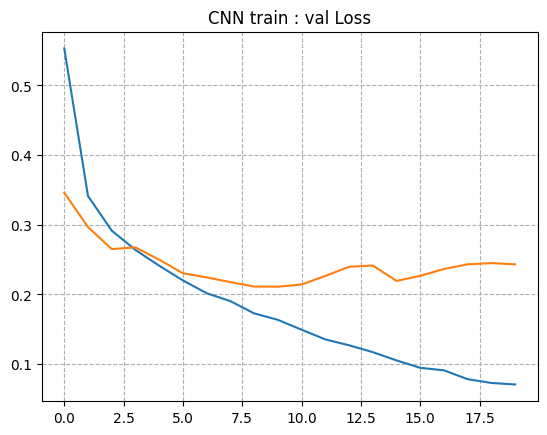

In [13]:
plt.title("CNN train : val Loss")
plt.plot(history.epoch, history.history["loss"])
plt.plot(history.epoch, history.history["val_loss"])
plt.grid(linestyle = "--")
plt.show()

### 훈련 vs 검증의 정확도 비교 곡선 그리기

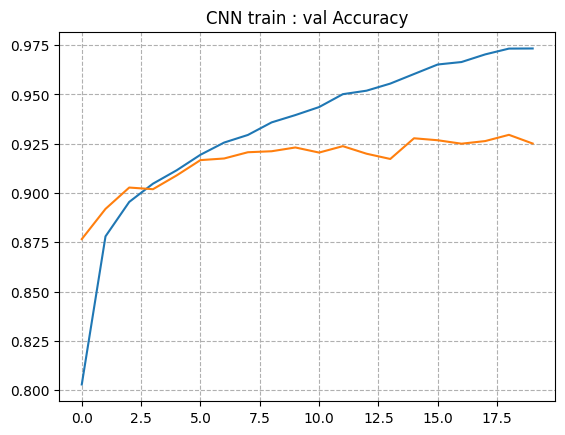

In [14]:
plt.title("CNN train : val Accuracy")
plt.plot(history.epoch, history.history["accuracy"])
plt.plot(history.epoch, history.history["val_accuracy"])
plt.grid(linestyle = "--")
plt.show()

### 성능 검증(evaluate)하기

In [16]:
### 최종 성능 검증 결과 확인하기
# 훈련데이터를 이용한 손실 및 정확도 확인하기
train_score = model.evaluate(train_scaled, train_target)
print(f"훈련 데이터 - 손실율 : {train_score[0]}, 정확도 : {train_score[1]}")

# 검증데이터를 이용한 손실 및 정확도 확인하기
val_score = model.evaluate(val_scaled, val_target)
print(f"검증 데이터 - 손실율 : {val_score[0]}, 정확도 : {val_score[1]}")

1500/1500 [==============================] - 4s 3ms/step - loss: 0.1262 - accuracy: 0.9565
훈련 데이터 - 손실율 : 0.1262376606464386, 정확도 : 0.9565416574478149
375/375 [==============================] - 1s 2ms/step - loss: 0.2110 - accuracy: 0.9231
검증 데이터 - 손실율 : 0.21104180812835693, 정확도 : 0.9230833053588867


### 훈련에 사용된 데이터를 이미지로 그리기

In [20]:
### 검증 데이터 1개 이미지로 그려보기
# - 훈련에 사용한 데이터를 이미지로 그리기 위해서는 원본 차원으로 변환해야 합니다.
print(val_scaled[0])

# - 훈련에 사용된 데이터 차원은 (28, 28, 1)
print(val_scaled[0].shape)

### 원본 데이터의 차원은 (28, 28)
# - 0번째 이미지 데이터를 2차원으로 변환하기
val_scaled_0 = val_scaled[0].reshape(28, 28)

print(val_scaled_0.shape)


[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.00784314]
  [0.0

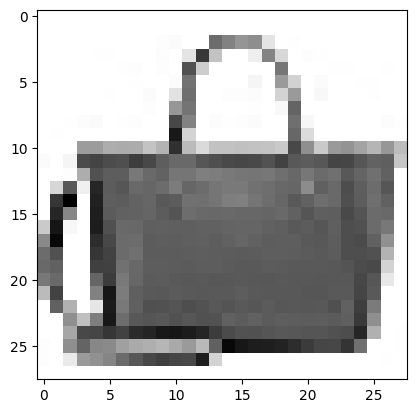

In [ ]:
### 0번째 이미지데이터를 이용해서 이미지로 시각화하기..
# plt.imshow(val_scaled_0)

### - cmap="gray_r" : 색상 반전(바탕은 흰색으로, 이미지가 있는 부분은 그레이색으로..)
plt.imshow(val_scaled_0, cmap="gray_r")

plt.show()

In [ ]:
### 검증데이터의 0번째 종속변수의 정답 확인하기
# - 가방 : 8번
val_target[0]

8

### 예측하기

In [ ]:
### 검증 데이터의 0번째 데이터를 이용하여 예측하기
# - 0번째 검증데이터 추출하기
val_scaled[ : 1]

### 예측하기
val_pred_0 = model.predict(val_scaled[:1])
val_pred_0[0]

1/1 [==============================] - 0s 31ms/step


array([3.3286956e-13, 5.5083534e-20, 7.7170869e-17, 2.8718459e-14,
       1.4890007e-12, 8.0713967e-13, 1.4266378e-14, 5.1516551e-12,
       1.0000000e+00, 4.8181435e-13], dtype=float32)

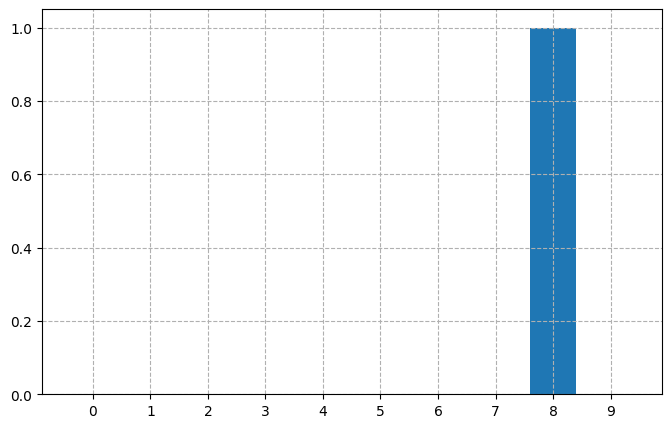

In [ ]:
# 막대그래프 그리기
plt.figure(figsize=(8, 5))
plt.bar(range(len(val_pred_0[0])), val_pred_0[0])
plt.xticks(range(len(val_pred_0[0])))
plt.grid(linestyle = "--")
plt.show()

In [53]:
### 종속변수의 범주 명칭
classes = ["티셔츠", "바지", "스웨터", "드레스", "코트", "샌달", "셔츠", "스니커즈", "가방", "앵클부츠"]

classes

['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

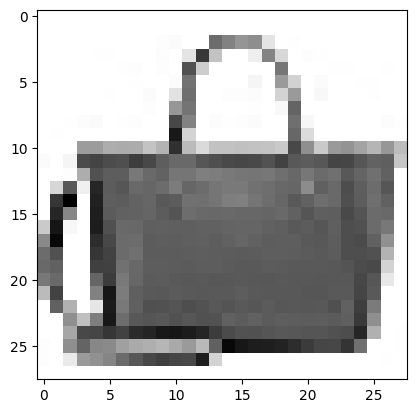

예측값 : 8
예측값(한글명) : 가방
실제값(한글명) : 가방


In [58]:
plt.imshow(val_scaled_0, cmap="gray_r")
plt.show()

print(f"예측값 : {np.argmax(val_pred_0)}")
print(f"예측값(한글명) : {classes[np.argmax(val_pred_0)]}")
print(f"실제값(한글명) : {classes[val_target[0]]}")

### 테스트 데이터로 예측하기

In [ ]:
"""
 - 전체 테스트 데이터를 이용해서 예측하기
 - 예측 결과 중 10개 데이터만 추출하기
 - 10개 각각 예측결과에 대해서,
  -> 실제 이미지그리기, 예측값/예측값(한글명)/실제값(한글명) 출력하기
"""

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.05098039]
 [0.2627451 ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.19607843]
 [0.14901961]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]
313/313 [==============================] - 1s 2ms/step
(10000, 10)


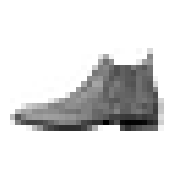

예측값 : 9
예측값(한글명) : 앵클부츠
실제값(한글명) : 앵클부츠


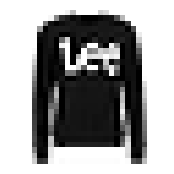

예측값 : 2
예측값(한글명) : 스웨터
실제값(한글명) : 스웨터


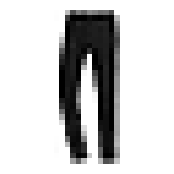

예측값 : 1
예측값(한글명) : 바지
실제값(한글명) : 바지


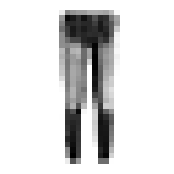

예측값 : 1
예측값(한글명) : 바지
실제값(한글명) : 바지


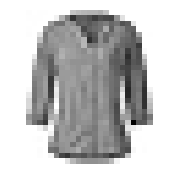

예측값 : 6
예측값(한글명) : 셔츠
실제값(한글명) : 셔츠


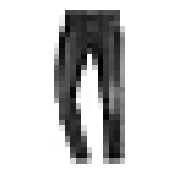

예측값 : 1
예측값(한글명) : 바지
실제값(한글명) : 바지


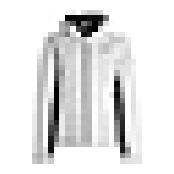

예측값 : 4
예측값(한글명) : 코트
실제값(한글명) : 코트


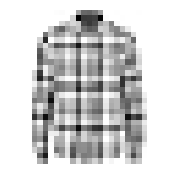

예측값 : 6
예측값(한글명) : 셔츠
실제값(한글명) : 셔츠


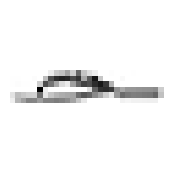

예측값 : 5
예측값(한글명) : 샌달
실제값(한글명) : 샌달


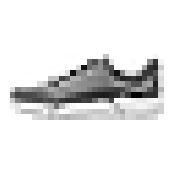

예측값 : 7
예측값(한글명) : 스니커즈
실제값(한글명) : 스니커즈


In [92]:
test_input_4d = test_input.reshape(-1, 28, 28, 1)

test_scaled = test_input_4d / 255
print(test_scaled[1][0])

### 테스 데이터 전체로 예측하기
test_pred = model.predict(test_scaled)
print(test_pred.shape)

### 예측결과 상위 10개에 대해서만 출력
for i in range(10):
    # 이미지 사이즈 지정
    plt.figure(figsize=(2,2))
    
    # 이미지 2차원으로 변환 수 시각화
    plt.imshow(test_scaled[i].reshape(28, 28), cmap="gray_r")
    plt.axis('off')
    plt.show()

    pred_idx = np.argmax(test_pred[i])
    print(f"예측값 : {pred_idx}")
    print(f"예측값(한글명) : {classes[pred_idx]}")
    print(f"실제값(한글명) : {classes[test_target[i]]}")